In [14]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from matplotlib import style
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


## Frequency Sweep (Chirp Generation)

We'll generate a frequency sweep from 2-4 GHz. Since, it's not possible to visualize such a sweep, we create a very simple trivial example just to give an idea.

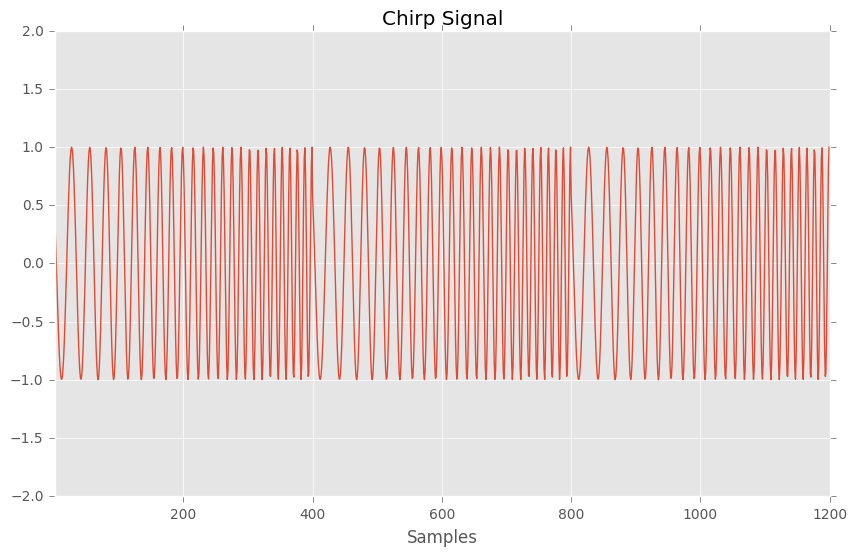

In [3]:
N=400
t = np.linspace(1,10,400)
sig = signal.chirp(t, 1, 10, 4)
sig = np.concatenate((sig, sig, sig))
plt.plot(sig)
plt.axis([1, 3*N, -2, 2])
plt.title('Chirp Signal')
plt.xlabel('Samples')

## Simulated Output After Mixer

In order to apply further algorithms, we need to simulate the output (a baseband signal) of analog mixer. At any point, we will receieve a linear combination of all delta frequencies. Here, delta frequencies simply indicate the round trip distance from transmitter to the object. The greater the distance the more the delta f and vice versa. Another important thing is the intensity of signal being received. If the object is close to transmitter and is sending back a direct reflection, intensity of receieved baseband signal will be high.

For our simulation purposes, we assume we just have four static reflectors: these could be any objects in a room such as fridge, tv etc. Of course, practically, we would have a lot more reflections including backscattered reflections but we ignore them for now.

Suppose, objects are located at distances which translate to frequencies of:

In [4]:
freqs = [20, 30, 40, 45]

Suppose, their intensities are:

In [5]:
intensities = [85, 40, 25, 20]

Then, we can generate a received baseband signal.

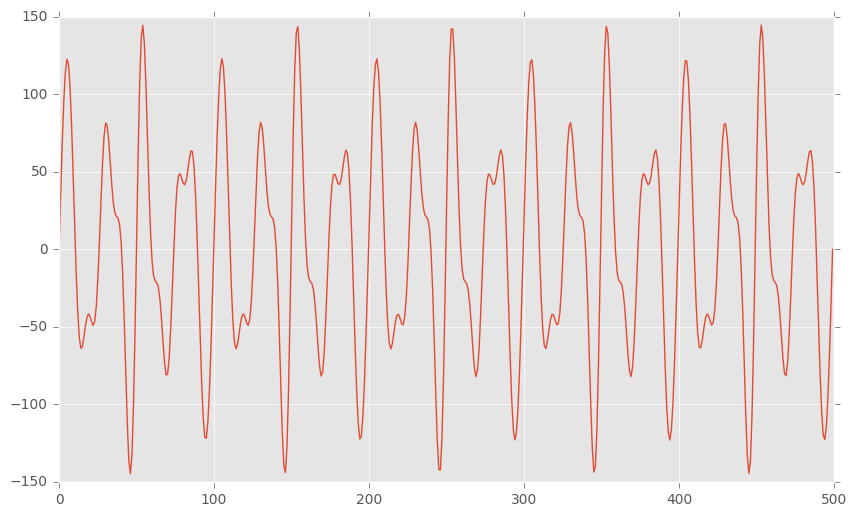

In [6]:
x = np.linspace(-np.pi, np.pi, 500)
baseband = 85*np.sin(20*x) + 35*np.sin(30*x) + 25*np.sin(40*x) + 20*np.sin(45*x)
plt.plot(baseband)

Let's also add some guassian noise.

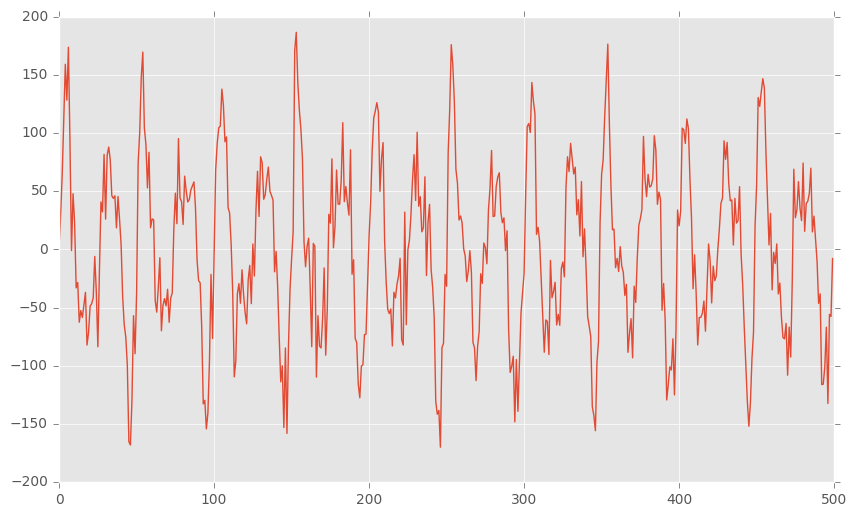

In [7]:
noise = np.random.normal(0, 1, 500)
baseband += 25 * noise
plt.plot(baseband)

Now, we can take FFT to get TOF profile. The profile simply indicates there are 4 targets at distinct frequencies.

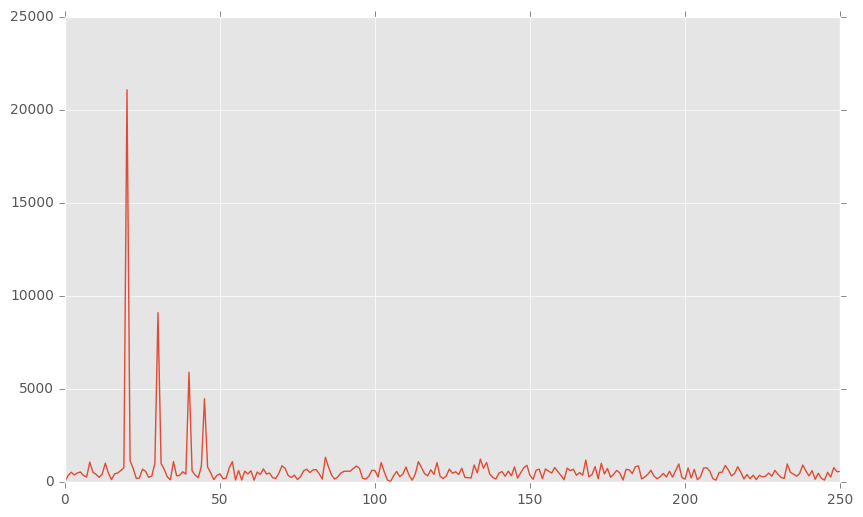

In [8]:
plt.plot(np.abs(np.fft.rfft(baseband)))

## There is a Human Moving Now

Assume the position of human changes by 1 point in each sweep.

In [9]:
pos = [15, 18, 22, 24, 27]

Now, let's simulate 5 baseband signals.

In [10]:
x = np.linspace(-np.pi, np.pi, 500)
static = 85*np.sin(20*x) + 35*np.sin(30*x) + 25*np.sin(40*x) + 20*np.sin(45*x) + 25*noise
basebands = [static + (40*np.sin(p*x)) for p in pos]

Now, make a TOF profile for each sweep.

In [11]:
ffts = [np.abs(np.fft.rfft(b)) for b in basebands]

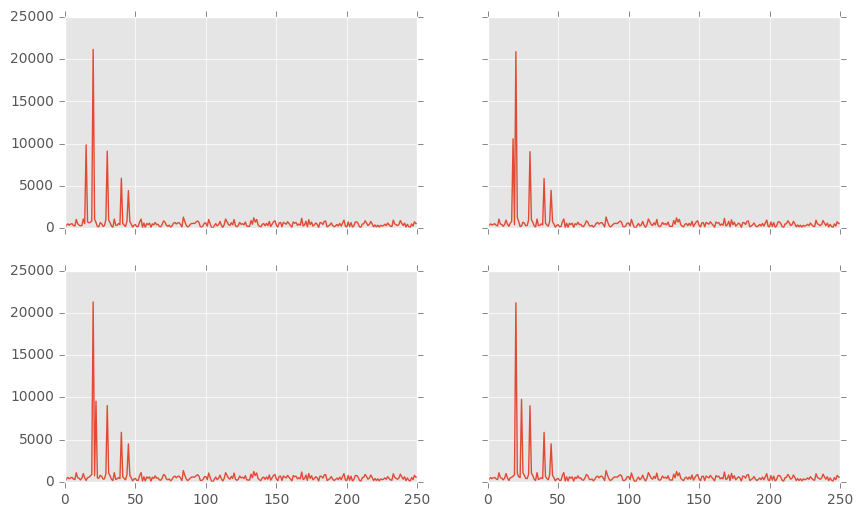

In [12]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(ffts[0])
ax2.plot(ffts[1])
ax3.plot(ffts[2])
ax4.plot(ffts[3])

Finally, we subtract successive sweeps and add the diffs to track motion.

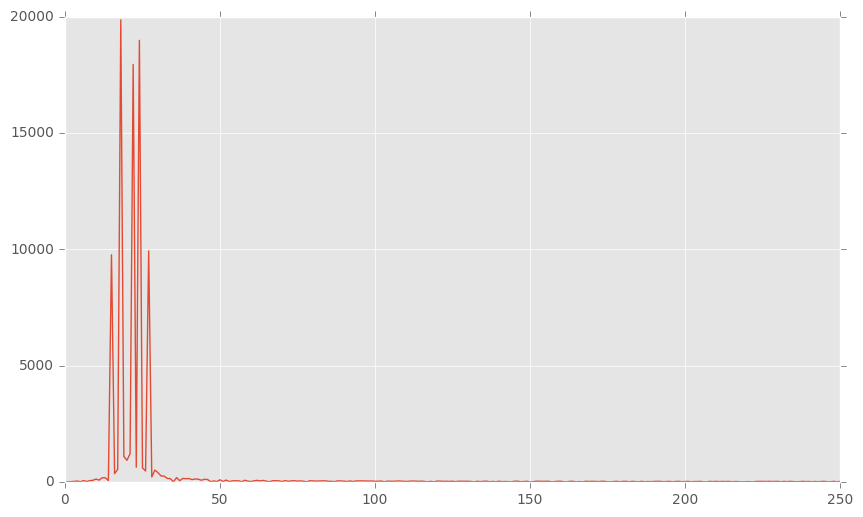

In [15]:
diff1 = np.abs(ffts[1] - ffts[0])
diff2 = np.abs(ffts[2] - ffts[1])
diff3 = np.abs(ffts[3] - ffts[2])
diff4 = np.abs(ffts[4] - ffts[3])

plt.plot(diff1 + diff2 + diff3 + diff4)

## Target Localization Using 2 Antennas